# **Encoding**

Unique values in categorical columns:
gender: ['Female' 'Male' 'Other']
location_type: ['Urban' 'Suburban' 'Rural']

Data after encoding:
  user_id  age  daily_screen_time_hours  phone_usage_hours  \
0  user_1   51                      4.8                3.4   
1  user_2   64                      3.9                3.5   
2  user_3   41                     10.5                2.1   
3  user_4   27                      8.8                0.0   
4  user_5   55                      5.9                1.7   

   laptop_usage_hours  tablet_usage_hours  tv_usage_hours  social_media_hours  \
0                 1.3                 1.6             1.6                 4.1   
1                 1.8                 0.9             2.0                 2.7   
2                 2.6                 0.7             2.2                 3.0   
3                 0.0                 0.7             2.5                 3.3   
4                 1.1                 1.5             1.6                 1.1   

  

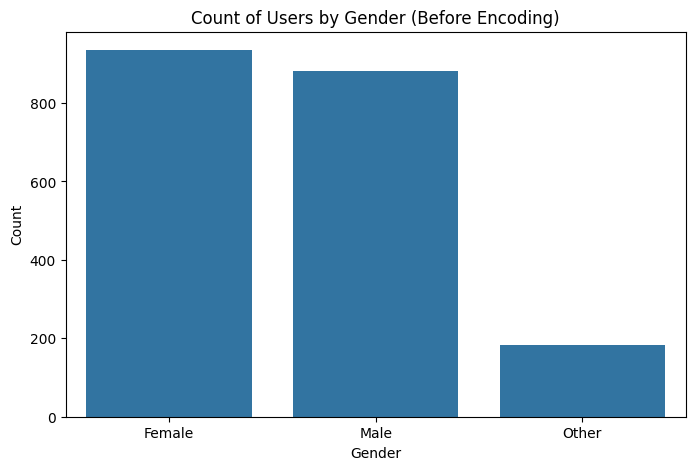

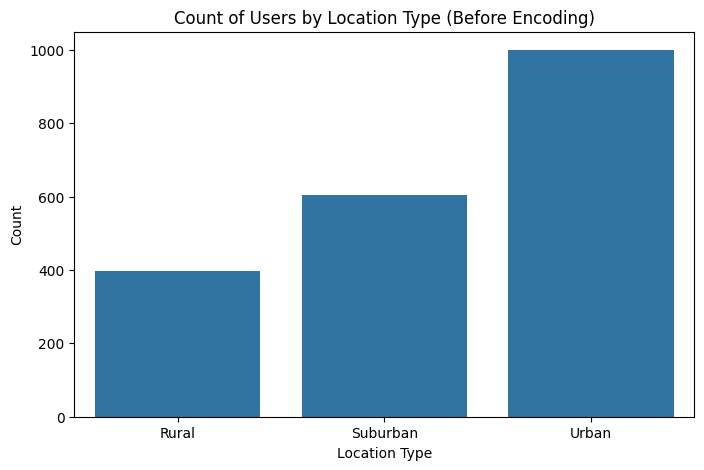

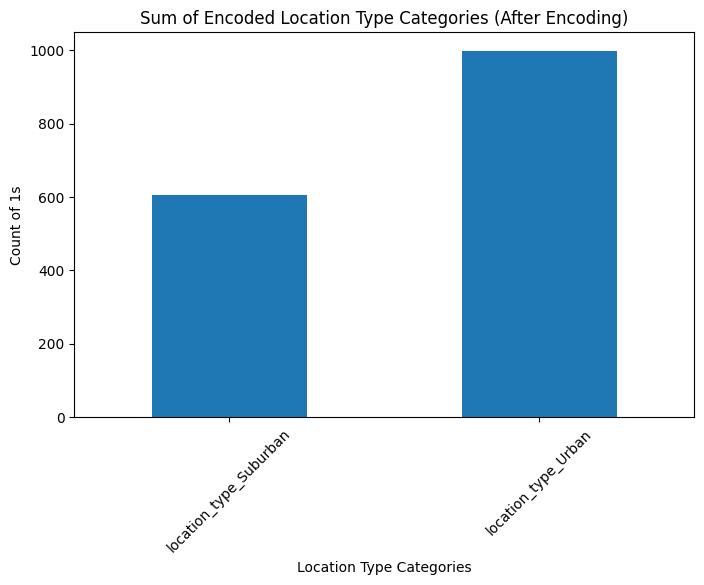

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (assume from previous step or raw)
df = pd.read_csv('processed_missing.csv')  # Or 'processed_missing.csv'

# Step 1: Identify categorical columns and verify their values
categorical_cols = ['gender', 'location_type']
print("Unique values in categorical columns:")
for col in categorical_cols:
    unique_vals = df[col].unique()
    print(f"{col}: {unique_vals}")
    if col == 'location_type' and not all(x in unique_vals for x in ['Rural', 'Suburban', 'Urban']):
        print("Warning: Expected categories (Rural, Suburban, Urban) not all present in location_type.")

# Step 2: One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Drop first to avoid multicollinearity
encoded = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate and drop originals
df_encoded = pd.concat([df.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Step 3: Verify
print("\nData after encoding:")
print(df_encoded.head())
print("\nNote: The first category of each column (e.g., Rural for location_type if alphabetically first) is dropped as the reference and represented by 0s in the other columns.")

# Step 4: EDA Visualization - Countplot of gender (original)
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', data=df)
plt.title('Count of Users by Gender (Before Encoding)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Step 5: EDA Visualization - Countplot of location_type (original)
plt.figure(figsize=(8, 5))
sns.countplot(x='location_type', data=df, order=sorted(df['location_type'].dropna().unique()))
plt.title('Count of Users by Location Type (Before Encoding)')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.show()

# Step 6: EDA Visualization - Sum of encoded location_type columns
plt.figure(figsize=(8, 5))
loc_cols = [col for col in df_encoded.columns if col.startswith('location_type_')]
df_encoded[loc_cols].sum().plot(kind='bar')
plt.title('Sum of Encoded Location Type Categories (After Encoding)')
plt.xlabel('Location Type Categories')
plt.ylabel('Count of 1s')
plt.xticks(rotation=45)
plt.show()

# Interpretation: The first plot shows the distribution of gender categories. The second plot displays the distribution of location_type categories present in the data. The third plot shows the sum of 1s in the encoded location_type columns, where the dropped category (e.g., Rural) is represented by 0s in all other columns.

# Save processed data
df_encoded.to_csv('processed_encoding.csv', index=False)